## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

#import pandas_datareader.data as pdweb
#from pandas_datareader.data import DataReader
#from datetime import datetime
#from io import StringIO

In [2]:
rawd = pd.read_csv('mvtWeek1.csv')
rawd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
Latitude               189365 non-null float64
Longitude              189365 non-null float64
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 13.5+ MB


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rawd.describe()

,ID,Beat,Year,Latitude,Longitude
count,1.916410e+05,191641.000000,191641.000000,189365.000000,189365.000000
mean,4.968629e+06,1258.810771,2006.134940,41.844555,-87.677782
std,2.342997e+06,702.530465,3.520285,0.085583,0.057333
min,1.310022e+06,111.000000,2001.000000,41.644710,-87.925510
25%,2.832144e+06,722.000000,2003.000000,41.771618,-87.718474
50%,4.762956e+06,1121.000000,2006.000000,41.850029,-87.677597
75%,7.201878e+06,1733.000000,2009.000000,41.917116,-87.635513
max,9.181151e+06,2535.000000,2012.000000,42.022878,-87.524676


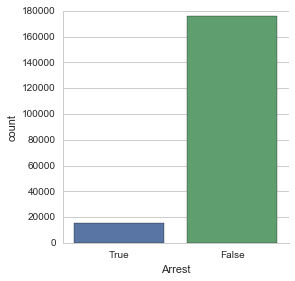

In [18]:
sns.factorplot('Arrest',data=rawd,kind='count',order=[True,False])

In [14]:
len(rawd[rawd.Arrest == True])

15536

In [15]:
len(rawd[rawd.LocationDescription == 'ALLEY'])

2308

In [3]:
from datetime import datetime

In [ ]:
rawd.head()

In [4]:
def xxx(OriginalDT):
    dt = datetime.strptime(OriginalDT,'%m/%d/%y %H:%M')
    return dt.date()

rawd['DateConvert'] = rawd['Date'].apply(xxx)

# I DID IT!! DateConvert!! '%y' = two-digit year and '%Y' = four-digit year?

In [6]:
rawd.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,DateConvert
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645,2012-12-31
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,2012-12-31
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,2012-12-31
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,2012-12-31
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761,2012-12-31


In [41]:
sorted(rawd['DateConvert'].dropna())[int(len(rawd['DateConvert'].dropna())/2)]

# What is the median month-year of this new DateConvert column?

datetime.date(2006, 5, 21)

In [5]:
# Now create two new variables in our data frame Month and Weekday

def F2(DTC):
    dt = DTC.month
    return dt

rawd['Month'] = rawd['DateConvert'].apply(F2)

In [6]:
def F3(DTC):
    dt = DTC.weekday()
    return dt

rawd['WeekdayID'] = rawd['DateConvert'].apply(F3)

In [7]:
import calendar

def F4(WDID):
    daynm = calendar.day_name[WDID]
    return daynm

rawd['WeekdayName'] = rawd['WeekdayID'].apply(F4)

In [12]:
rawd.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,DateConvert,Month,WeekdayID,WeekdayName
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645,2012-12-31,12,0,Monday
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,2012-12-31,12,0,Monday
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,2012-12-31,12,0,Monday
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,2012-12-31,12,0,Monday
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761,2012-12-31,12,0,Monday


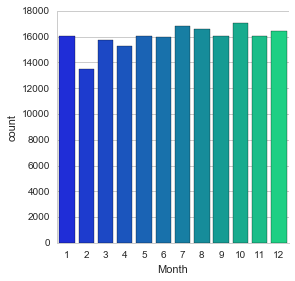

In [13]:
sns.factorplot('Month',data=rawd,kind='count',palette='winter')

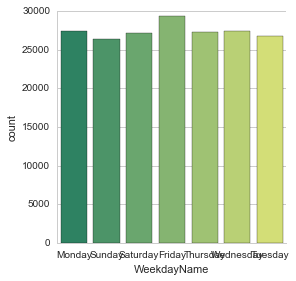

In [14]:
sns.factorplot('WeekdayName',data=rawd,kind='count',palette='summer')

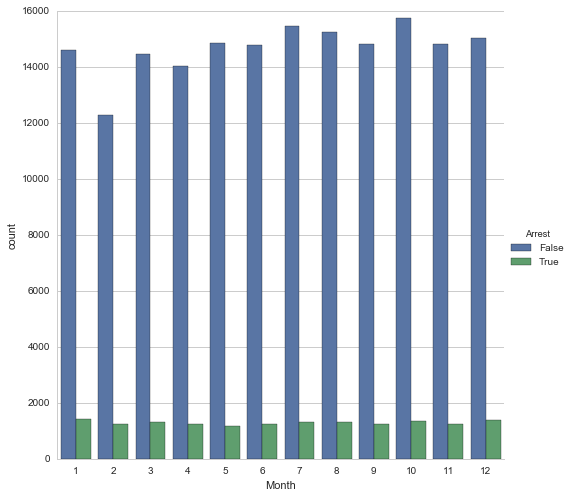

In [16]:
sns.factorplot('Month',data=rawd,kind='count',hue='Arrest',size=7)

In [19]:
tmp = rawd[rawd['Arrest']==True]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15536 entries, 5 to 191630
Data columns (total 15 columns):
ID                     15536 non-null int64
Date                   15536 non-null object
LocationDescription    15536 non-null object
Arrest                 15536 non-null bool
Domestic               15536 non-null bool
Beat                   15536 non-null int64
District               10886 non-null object
CommunityArea          12810 non-null object
Year                   15536 non-null int64
Latitude               15354 non-null float64
Longitude              15354 non-null float64
DateConvert            15536 non-null object
Month                  15536 non-null int64
WeekdayID              15536 non-null int64
WeekdayName            15536 non-null object
dtypes: bool(2), float64(2), int64(5), object(6)
memory usage: 1.7+ MB


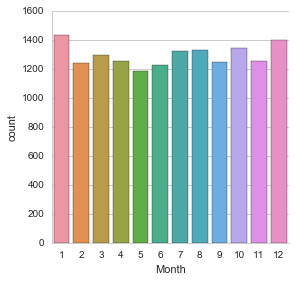

In [20]:
sns.factorplot('Month',data=tmp,kind='count')

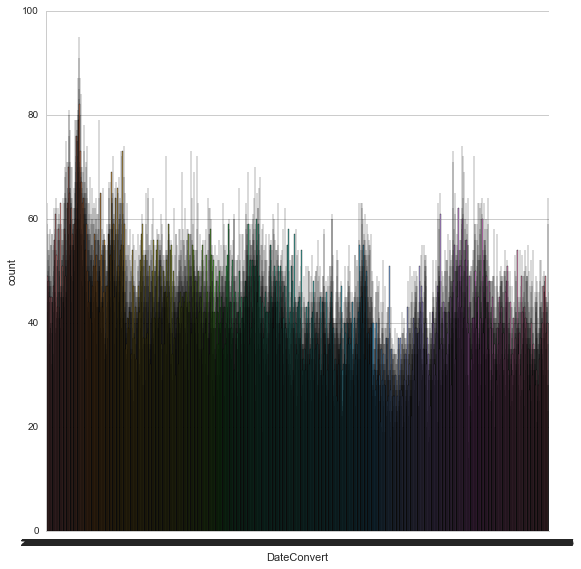

In [116]:
del tmp
# This is how not to plot a histogram

sns.factorplot('DateConvert',data=rawd,size=8,kind='count',order=sorted(rawd['DateConvert'].unique()))

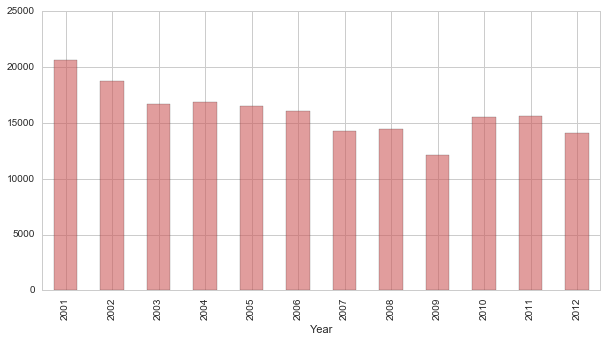

In [8]:
# This is how to plot a histogram (bins = 1 year)
rawd['ID'].groupby(rawd['Year']).count().plot(kind="bar",color='indianred',figsize=(10,5),alpha=0.6)

In [119]:
# This must be run before the above step (or not?)

def F66(DTC):
    dt = DTC.year
    return dt

rawd['Year'] = rawd['DateConvert'].apply(F66)

In [33]:
rawd1H = rawd[rawd['Year'] < 2007]
rawd2H = rawd[rawd['Year'] >=2007]
tmp1 = len(rawd1H[rawd1H['Arrest']==True])
tmp2 = len(rawd2H[rawd2H['Arrest']==True])
tmp1-tmp2

del rawd1H
del rawd2H
del tmp1
del tmp2

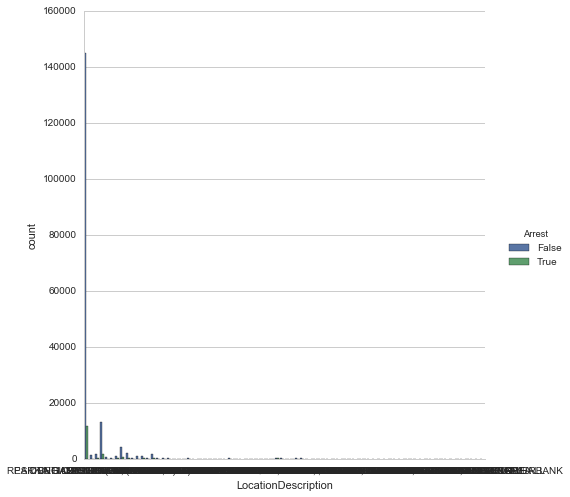

In [34]:
sns.factorplot('LocationDescription',data=rawd,kind='count',hue='Arrest',size=7)

In [14]:
# Grab top 5-6 values only

rawd.groupby('LocationDescription')['ID'].count().sort_values(ascending=False)[:6]

LocationDescription
STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: ID, dtype: int64

In [23]:
# Now which location has the highest arrest rate?

temptable = pd.pivot_table(rawd, values='one', index=['LocationDescription'],columns=['Arrest'], aggfunc=np.sum)
temptable

Arrest,False,True
LocationDescription,,
ABANDONED BUILDING,4.0,NaN
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,4.0,NaN
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,1.0,NaN
AIRPORT EXTERIOR - NON-SECURE AREA,18.0,6.0
AIRPORT EXTERIOR - SECURE AREA,1.0,NaN
AIRPORT PARKING LOT,8.0,3.0
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,5.0,NaN
AIRPORT VENDING ESTABLISHMENT,4.0,6.0
AIRPORT/AIRCRAFT,267.0,96.0


In [16]:
# Must run before the above step
rawd['one']=1
rawd.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,DateConvert,Month,WeekdayID,WeekdayName,one
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645,2012-12-31,12,0,Monday,1
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,2012-12-31,12,0,Monday,1
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,2012-12-31,12,0,Monday,1
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,2012-12-31,12,0,Monday,1
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761,2012-12-31,12,0,Monday,1


In [40]:
temp = rawd[rawd['LocationDescription']=='DRIVEWAY - RESIDENTIAL']
tmp = temp[temptable['Arrest']==True]
tmp.info()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


IndexingError: Unalignable boolean Series key provided

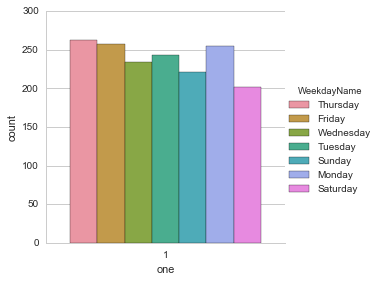

In [41]:
sns.factorplot('one',data=temp,kind='count',hue='WeekdayName')